In [1]:
import struct
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

## PNN model

In [2]:
def read_mnist(train_images_path, train_labels_path, test_images_path, test_labels_path):
    with open(train_labels_path, 'rb') as p:
        magic, n = struct.unpack('>II', p.read(8))
        train_labels = np.fromfile(p, dtype=np.uint8)
    with open(train_images_path, 'rb') as p:
        magic, num, rows, cols = struct.unpack(">IIII", p.read(16))
        train_images = np.fromfile(p, dtype=np.uint8).reshape(len(train_labels), 784)
    with open(test_labels_path, 'rb') as p:
        magic, n = struct.unpack('>II', p.read(8))
        test_labels = np.fromfile(p, dtype=np.uint8)
    with open(test_images_path, 'rb') as p:
        magic, num, rows, cols = struct.unpack(">IIII", p.read(16))
        test_images = np.fromfile(p, dtype=np.uint8).reshape(len(test_labels), 784)

    return train_images, train_labels, test_images, test_labels

In [3]:
def load_data():     
    X_train, Y_train, X_test, Y_test = read_mnist('mnist/train-images.idx3-ubyte', 'mnist/train-labels.idx1-ubyte',
                                                  'mnist/t10k-images.idx3-ubyte', 'mnist/t10k-labels.idx1-ubyte')
    
    train_set_x = X_train.reshape(X_train.shape[0], -1).T
    train_set_y = Y_train.reshape((1, Y_train.shape[0]))
    test_set_x = X_test.reshape(X_test.shape[0], -1).T
    test_set_y = Y_test.reshape((1, Y_test.shape[0]))
    
    return train_set_x, test_set_x, train_set_y, test_set_y

In [4]:
train_set_x, test_set_x, train_set_y, test_set_y = load_data()
print('train set shapes: ', train_set_x.shape, train_set_y.shape)
print('test set shapes: ', test_set_x.shape, test_set_y.shape)

train set shapes:  (784, 60000) (1, 60000)
test set shapes:  (784, 10000) (1, 10000)


In [5]:
def plot_digit(x_set, y_set, idx):
    img = x_set.T[idx].reshape(28,28)
    plt.imshow(img, cmap='Greys',  interpolation='nearest')
    plt.title('true label: %d' % y_set.T[idx])
    plt.show()

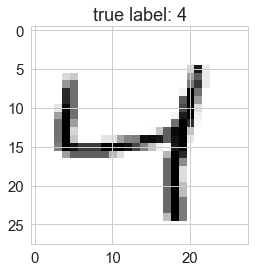

In [6]:
plot_digit(train_set_x, train_set_y, idx=2)

In [7]:
train_set_x = train_set_x / 255.
train_set_x = train_set_x.T
test_set_x = test_set_x / 255.
test_set_x = test_set_x.T
train_set_y, test_set_y = train_set_y.T, test_set_y.T 

In [8]:
train_set = sorted(zip(train_set_y, train_set_x), key=lambda tup: tup[0])

train_set_x = np.array([x[1] for x in train_set])
train_set_y = np.array([x[0] for x in train_set])

In [9]:
j = 0
count_list = []
for i in range(10):
    count = 0
    while j != 60000 and train_set_y[j][0] == i:
        j += 1
        count += 1
    count_list.append(j)

In [10]:
K = np.zeros((10,60000))
for k in range(10):
    for i in range(train_set_x.shape[0]):
        s = 0
        for j in range(train_set_x.shape[1]):
            s += (train_set_x[i][j] - test_set_x[k][j])**2
        K[k][i] = np.exp(-s/0.5)

In [11]:
K_sum = np.zeros((10,10))
for i in range(K.shape[0]):
    K_sum[i][0] = np.sum(K[i][:count_list[0]])
    for j in range(1, 10):
        K_sum[i][j] = np.sum(K[i][count_list[j-1]:count_list[j]])

In [12]:
y_real = np.argmax(K_sum, axis=1)

In [17]:
print(y_real)
print(test_set_y.T[0][:10])

[7 2 1 0 4 1 4 9 5 9]
[7 2 1 0 4 1 4 9 5 9]


## Створення файлів train_set.csv та test_set.csv

In [ ]:
def one_hot(Y, n_classes):
    return np.eye(n_classes)[Y][0]

In [ ]:
train_set_y = one_hot(train_set_y.T, 10)
test_set_y = one_hot(test_set_y.T, 10)

In [ ]:
data = {'Вагові коефіцієнти': {},
        'Класи': {}}
    
for i in range(train_set_x.shape[0]):
    s = ""
    for j in range(train_set_x.shape[1]):
        if j == train_set_x.shape[1]-1:
            s += "{:.8}".format(train_set_x[i][j])
        else:
            s += "{:.8}, ".format(train_set_x[i][j])
    
    data['Вагові коефіцієнти'][str(i+1)] = s

for i in range(train_set_y.shape[0]):
    s = ""
    for j in range(train_set_y.shape[1]):
        if j == train_set_y.shape[1]-1:
            s += "{:.8}".format(train_set_y[i][j])
        else:
            s += "{:.8}, ".format(train_set_y[i][j])
            
    data['Класи'][str(i+1)] = s

In [ ]:
frame = pd.DataFrame.from_dict(data)

In [ ]:
frame.to_csv('train_set.csv', sep=',', header=True, index=True)

In [ ]:
data = {'Вагові коефіцієнти': {},
        'Класи': {}}
    
for i in range(test_set_x.shape[0]):
    s = ""
    for j in range(test_set_x.shape[1]):
        if j == test_set_x.shape[1]-1:
            s += "{:.8}".format(test_set_x[i][j])
        else:
            s += "{:.8}, ".format(test_set_x[i][j])
    
    data['Вагові коефіцієнти'][str(i+1)] = s

for i in range(test_set_y.shape[0]):
    s = ""
    for j in range(test_set_y.shape[1]):
        if j == test_set_y.shape[1]-1:
            s += "{:.8}".format(test_set_y[i][j])
        else:
            s += "{:.8}, ".format(test_set_y[i][j])
            
    data['Класи'][str(i+1)] = s

In [ ]:
frame = pd.DataFrame.from_dict(data)

In [ ]:
frame.to_csv('test_set.csv', sep=',', header=True, index=True)

In [ ]:
test_set_x = test_set_x / 255.
test_set_x = test_set_x.T

In [ ]:
test_set_y = one_hot(test_set_y, 10)